Predicting Player Performance in Basketball Using Machine Learning
INFO 1998 | Fall 2024 Final Project
Group Members: Rex Popick rp665, Addis Sahle as 3734, Rohan Sahu rs2649, 

Intro:
In this project, we aim to analyze/predict key performance metrics of professional basketball players, such as points scored and net rating, using machine learning techniques.

By identifying patterns and relationships within player demographic data (e.g., age, height, weight) and in-game statistics (e.g., rebounds, assists, usage percentage) we will hopefully be able to offer insight into which demographics lead to on court success.

Sources:
The dataset for this project was obtained from Kaggle and contains detailed statistics for basketball players across multiple seasons.

Dataset link: [Kaggle Basketball Dataset](https://www.kaggle.com/datasets/justinas/nba-players-data)

The dataset includes 12,844 entries with 22 features for players such as:

Demographics: Age, height, weight, college, and country.

Performance metrics: Points, rebounds, assists, and advanced stats like net rating, usage percentage, and true shooting percentage.

Contextual data: Team and season information.

In [9]:
import pandas as pd
data = pd.read_csv('/Users/rexpopick/Downloads/all_seasons.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Data Preprocessing:

1. Remove rows with null values
2. Filter for data after 2010 (only evaluating modern era)

Dataset was well made with no null values, no reason to drop any columns

In [18]:
print("Dataset shape before dropping nulls:", data.shape)
data = data.dropna()
print("Dataset shape after dropping nulls:", data.shape)

data_filtered = data[data['season'].apply(lambda x: int(x.split('-')[0]) > 2009)]
data_filtered.head()

Dataset shape before dropping nulls: (10990, 22)
Dataset shape after dropping nulls: (10990, 22)


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6227,6227,JaVale McGee,WAS,23.0,213.36,114.305184,Nevada,USA,2008,1,...,10.1,8.0,0.5,-4.4,0.116,0.214,0.165,0.566,0.027,2010-11
6228,6228,Jamaal Magloire,MIA,33.0,210.82,115.665960,Kentucky,Canada,2000,1,...,1.9,3.4,0.2,7.2,0.131,0.352,0.105,0.585,0.031,2010-11
6229,6229,James Posey,IND,34.0,203.20,98.429464,Xavier,USA,1999,1,...,4.9,3.0,0.7,-3.7,0.013,0.193,0.146,0.485,0.068,2010-11
6230,6230,Jamario Moon,LAC,31.0,203.20,92.986360,Meridian Community College,USA,Undrafted,Undrafted,...,4.3,2.8,0.9,-6.5,0.025,0.154,0.120,0.499,0.074,2010-11
6231,6231,Jameer Nelson,ORL,29.0,182.88,86.182480,Saint Joseph's,USA,2004,1,...,13.1,3.0,6.0,7.5,0.019,0.092,0.221,0.548,0.324,2010-11


Using a correlation matrix to see what targets and features are related

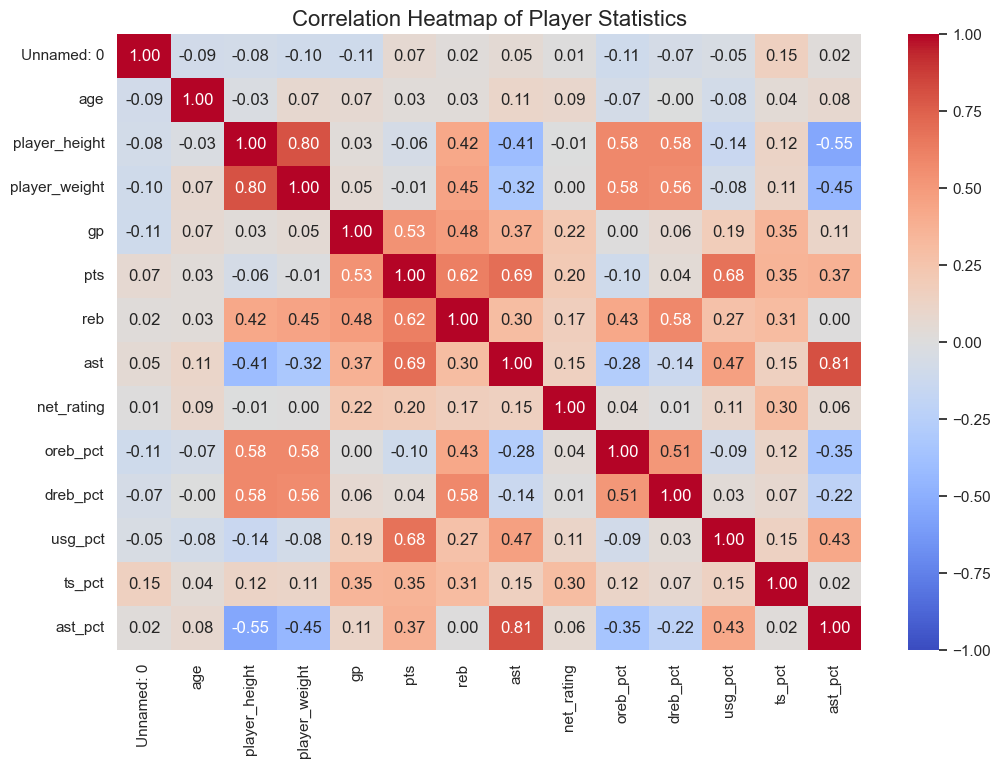

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 8))
correlation_matrix = data_filtered.select_dtypes(include=[np.number]).corr()  # Select only numeric columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Player Statistics', fontsize=16)
plt.show()

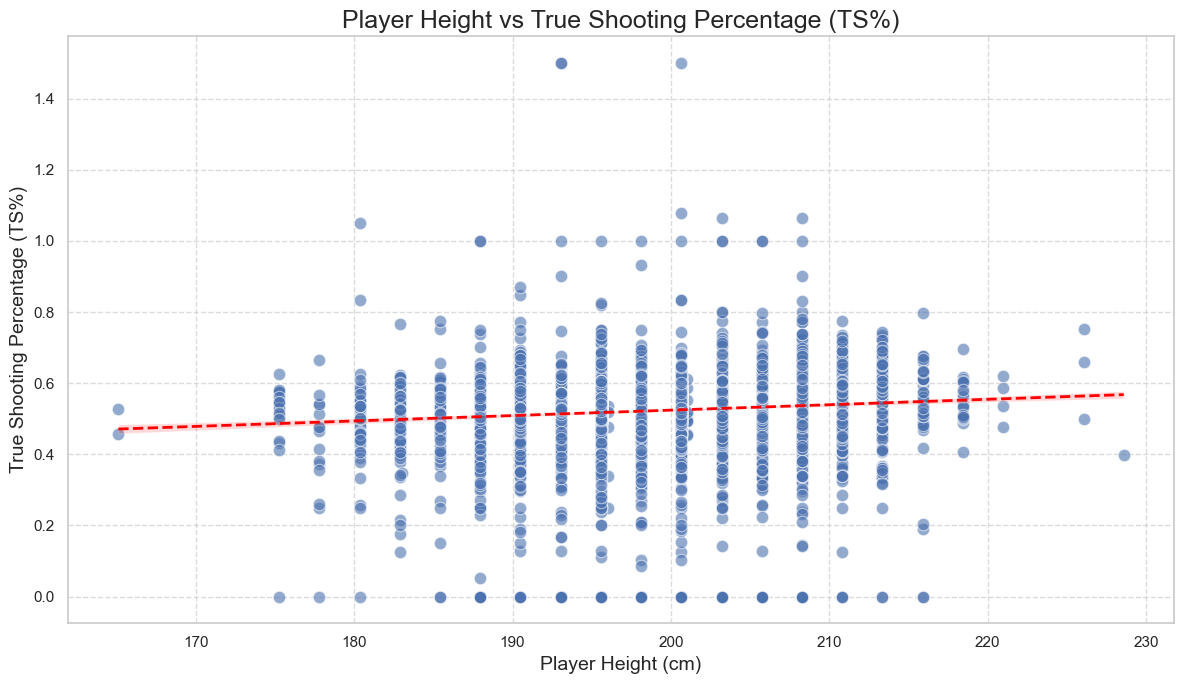

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

data_filtered_no_lambda = data[data['season'].apply(lambda x: int(x.split('-')[0]) > 2009)]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=data_filtered_no_lambda,
    x='player_height',
    y='ts_pct',
    alpha=0.6,
    edgecolor='w',  # Change edgecolor to white
    s=80  # Marker size
)

# Adding a trend line
sns.regplot(
    data=data_filtered_no_lambda,
    x='player_height',
    y='ts_pct',
    scatter=False,
    color='red',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

plt.title('Player Height vs True Shooting Percentage (TS%)', fontsize=18)
plt.xlabel('Player Height (cm)', fontsize=14)
plt.ylabel('True Shooting Percentage (TS%)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)  # Grid line setting
plt.tight_layout()
plt.show()

This scatterplot visualizes the relationship between player height and true shooting percentage (TS%), with a weak positive trend indicated by the red dashed regression line. It shows that while taller players may have slightly higher TS%, the variability suggests height alone isn't a strong predictor of shooting efficiency. 

We used a scatterplot here as they're great for reveal individual data points, trends, and variability.

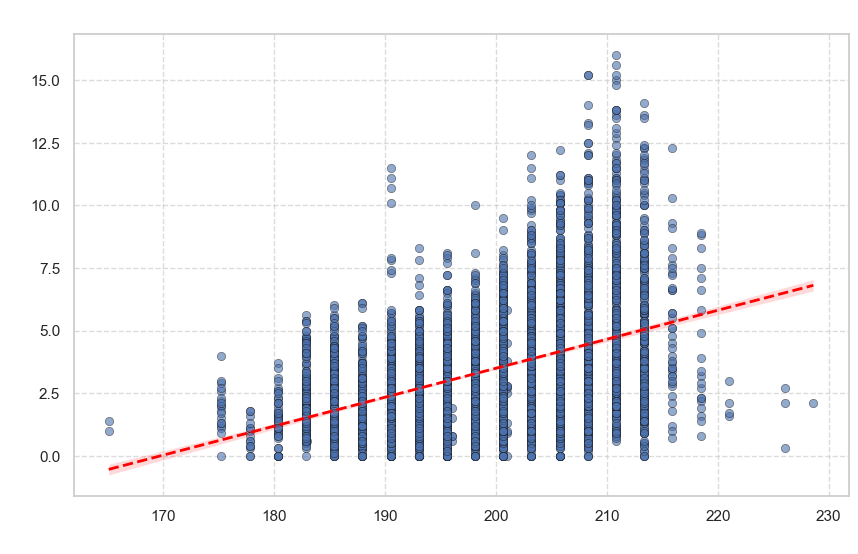

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_filtered_no_lambda, x='player_height', y='reb', alpha=0.6, edgecolor='k')
plt.title('Player Height vs Rebounds', fontsize=16, color='white')
plt.xlabel('Player Height (cm)', fontsize=12, color='white')
plt.ylabel('Rebounds', fontsize=12, color='white')

plt.grid(True, linestyle='--', alpha=0.7)

sns.regplot(
    data=data_filtered_no_lambda,
    x='player_height',
    y='reb',
    scatter=False,
    color='red',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

plt.show()

This scatterplot shows the relationship between player height and rebounds, with a red dashed regression line showing a positive correlation. Taller players tend to secure more rebounds, as indicated by the upward trend in the line, though there’s still significant variability.

A scatterplot is effective as it captures the distribution of data points and highlight the trend between these two variables.

## Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Prepare the data
features_regression = ['age', 'player_height', 'usg_pct', 'ast_pct', 'net_rating', 'ts_pct']
X_reg = data_filtered_no_lambda[features_regression]
y_reg = data_filtered_no_lambda['pts']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = lin_reg.predict(X_reg_test)

# Evaluate Linear Regression
mse_lin_reg = mean_squared_error(y_reg_test, y_reg_pred)
r2_lin_reg = lin_reg.score(X_reg_test, y_reg_test)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_reg_train, y_reg_train)
y_reg_pred_rf = rf_reg.predict(X_reg_test)

# Evaluate Random Forest Regressor
mse_rf_reg = mean_squared_error(y_reg_test, y_reg_pred_rf)
r2_rf_reg = rf_reg.score(X_reg_test, y_reg_test)

results_regression = {
    "Linear Regression": {"MSE": mse_lin_reg, "R2": r2_lin_reg},
    "Random Forest Regressor": {"MSE": mse_rf_reg, "R2": r2_rf_reg}
}

results_regression

{'Linear Regression': {'MSE': 14.875038880694493, 'R2': 0.5722614519788336},
 'Random Forest Regressor': {'MSE': 8.625082038984587,
  'R2': 0.7519818201815374}}

We used six key player stats—age, height, usage percentage (USG%), assist percentage (AST%), net rating, and true shooting percentage (TS%)—to predict how many points a player would score. 

The Random Forest model outperformed Linear Regression, with an R² of 0.75 compared to 0.57, meaning it did a much better job explaining the variation in player scoring.

## Random Forest Regressor Model

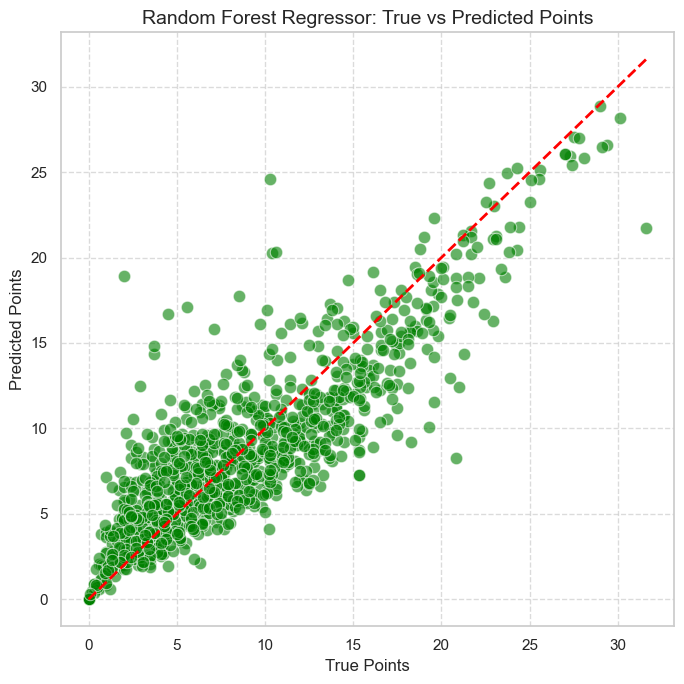

In [32]:
# Visualization for Random Forest Regressor
plt.figure(figsize=(7, 7))  # Adjusted size for single plot
sns.scatterplot(
    x=y_reg_test,
    y=y_reg_pred_rf,
    alpha=0.6,
    edgecolor='w',  # White edge color for points
    s=80,  # Marker size
    color='green'
)
sns.lineplot(
    x=[min(y_reg_test), max(y_reg_test)],
    y=[min(y_reg_test), max(y_reg_test)],
    color='red',
    linestyle='--',
    linewidth=2
)
plt.title('Random Forest Regressor: True vs Predicted Points', fontsize=14)
plt.xlabel('True Points', fontsize=12)
plt.ylabel('Predicted Points', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This scatterplot compares the true points scored by players (x-axis) with the points predicted by the Random Forest Regressor (y-axis). The red dashed line represents perfect predictions, and the clustering of green points around this line shows that the model predicts points fairly accurately, with some variability.

### Linear Regression Model

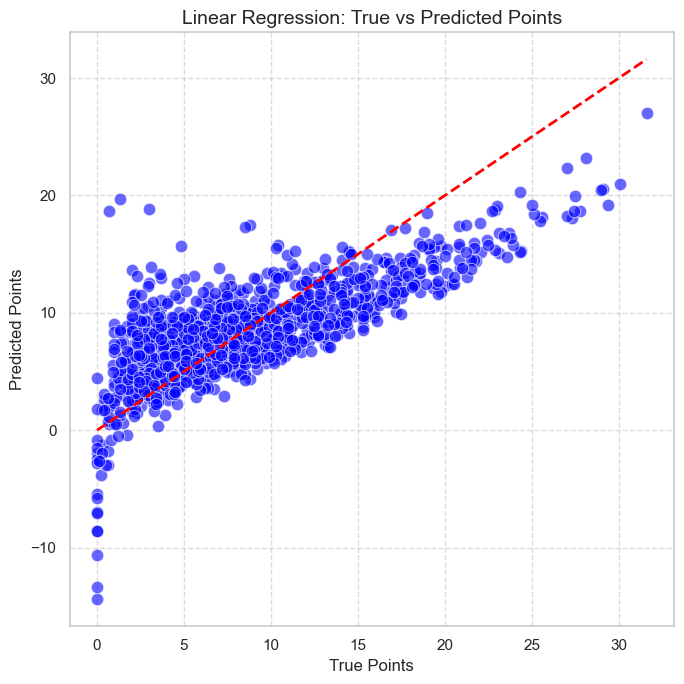

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')  # Ensures grid is enabled

# Visualization for Linear Regression
plt.figure(figsize=(7, 7))  # Adjusted size for single plot
sns.scatterplot(
    x=y_reg_test,
    y=y_reg_pred,
    alpha=0.6,
    edgecolor='w',  # White edge color for points
    s=80,  # Marker size
    color='blue'
)
sns.lineplot(
    x=[min(y_reg_test), max(y_reg_test)],
    y=[min(y_reg_test), max(y_reg_test)],
    color='red',
    linestyle='--',
    linewidth=2
)
plt.title('Linear Regression: True vs Predicted Points', fontsize=14)
plt.xlabel('True Points', fontsize=12)
plt.ylabel('Predicted Points', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This scatterplot compares the true points scored by players (x-axis) with the points predicted by the Linear Regression model (y-axis). While there is a general upward trend along the red dashed line of perfect predictions, the spread of blue points shows that the model struggles with accuracy, especially for  the higher or lower values.

Conclusion:

In this project, we analyzed how player stats can predict points scored, comparing Linear Regression and Random Forest models. The Random Forest model clearly stood out, providing more accurate and consistent predictions. This shows how combining the right features with a more advanced model can reveal deeper insights into what makes players successful on the court. With a bit more fine-tuning, this method could be a great tool for understanding and improving performance in basketball.